In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

##***GO OVER THE INITIAL ATTEMPT W DATASET ERRORS

In [2]:
crime_db = pd.read_csv('crime_data_LR_alt.csv', encoding='utf-8') 

In [3]:
crime_db.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
crime_db.columns[3]

'Murder and\nnonnegligent\nmanslaughter'

In [5]:
crime_db.rename(columns={ crime_db.columns[3]: 'Murder'},inplace=True)
crime_db.rename(columns={ crime_db.columns[8]: 'property_crime'},inplace=True)
crime_db.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [6]:
crime_db.columns

Index(['City', 'Population', 'Violent\ncrime', 'Murder',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'property_crime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [7]:
crime_db_p = crime_db[['Murder','Robbery']]
crime_db_p = crime_db_p.clip(upper=1)
crime_db_p.dropna()
crime_db_p['property_crime'] = crime_db['property_crime']

crime_db_p['Population'] = crime_db['Population']
crime_db_p['pop_sq'] = crime_db_p['Population']**2
crime_db_p.head()

,Murder,Robbery,property_crime,Population,pop_sq
0,0,0,12,1861,3463321
1,0,0,24,2577,6640929
2,0,0,16,2846,8099716
3,1,1,4090,97956,9595377936
4,0,1,223,6388,40806544


In [8]:
#crime_db_p['pop'] = crime_db['Population']
#crime_db_p['pop_sq'] = crime_db['Population']**2
#df['elderly'] = np.where(df['age']>=50, 'yes', 'no')

#crime_db_p['Murder'] = np.where(crime_db['Murder']=0, 0, 1)
#crime_db_p['Robbery'] = np.where(crime_db['Robbery']=0,0,1)

In [9]:
#crime_db_p['pop_sq'] = crime_db_p['Population']**2
#getting errors when I try to square, cant successfully convert to int...
#crime_db_p['pop_two'] = crime_db['Population']

In [10]:
crime_db_p.describe(include='all')
#print(crime_db_p.dtypes)

,Murder,Robbery,property_crime,Population,pop_sq
count,348.000,348.000,348.000,348.000,348.000
mean,0.141,0.601,792.606,40037.632,203554650960.236
std,0.348,0.490,7659.725,450037.368,3778875542708.130
min,0.000,0.000,0.000,526.000,276676.000
25%,0.000,0.000,40.500,3003.000,9018117.000
50%,0.000,1.000,112.500,7233.500,52325684.500
75%,0.000,1.000,341.000,18427.500,339753567.000
max,1.000,1.000,141971.000,8396126.000,70494931807876.000


In [11]:
#crime_db_p = crime_db_p.astype(np.float16)

In [12]:
regr = linear_model.LinearRegression()

In [14]:
Y = crime_db_p['property_crime']
X = crime_db_p[['Murder','Robbery','Population','pop_sq']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.52064781e+01 -9.62776475e+01  3.46570326e-02 -2.11109100e-09]

Intercept: 
 -109.57603177002693

R-squared:
0.9961247104743148


In [15]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Robbery,Population,pop_sq
Murder,1.000,0.313,0.162,0.133
Robbery,0.313,1.000,0.064,0.044
Population,0.162,0.064,1.000,0.998
pop_sq,0.133,0.044,0.998,1.000


In [16]:
#basic thought is model should be log[property_crime] = a + murder + robbery...
#+ log[pop] + log[pop_sq]
#...
#add dummy for new york?


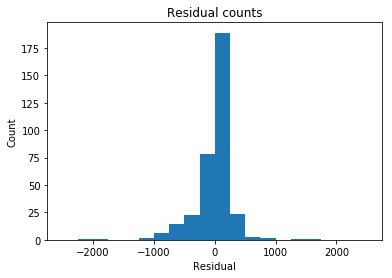

In [21]:
predicted = regr.predict(X).ravel()
actual = crime_db_p['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual, range = (-2500,2500), bins = 20)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

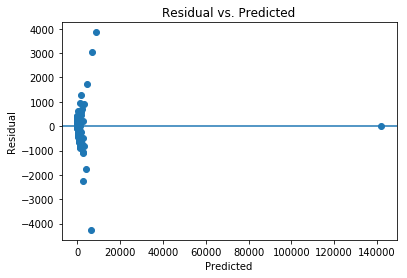

In [25]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [28]:
crime_db_p['pc_log'] = np.log10(crime_db_p.property_crime)
crime_db_p['pop_log'] = np.log10(crime_db_p.Population)
crime_db_p['pop_sq_log'] = np.log10(crime_db_p.pop_sq)
crime_db_p.head()

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


,Murder,Robbery,property_crime,Population,pop_sq,pc_log,pop_log,pop_sq_log
0,0,0,12,1861,3463321,1.079,3.270,6.539
1,0,0,24,2577,6640929,1.380,3.411,6.822
2,0,0,16,2846,8099716,1.204,3.454,6.908
3,1,1,4090,97956,9595377936,3.612,4.991,9.982
4,0,1,223,6388,40806544,2.348,3.805,7.611


In [30]:
Yy = crime_db_p['pc_log']
Xx = crime_db_p[['Murder','Robbery','pop_log','pop_sq_log']]
regr.fit(Xx, Yy)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(Xx, Yy))

#fix by removing areas where property crime equals zero... 
#or don't take the natural log when crime = zero (on error = 0)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
crime_db_p.describe(include='all')

,Murder,Robbery,property_crime,Population,pop_sq,pc_log,pop_log,pop_sq_log
count,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000
mean,0.141,0.601,792.606,40037.632,203554650960.236,-inf,3.890,7.779
std,0.348,0.490,7659.725,450037.368,3778875542708.130,nan,0.541,1.082
min,0.000,0.000,0.000,526.000,276676.000,-inf,2.721,5.442
25%,0.000,0.000,40.500,3003.000,9018117.000,1.607,3.478,6.955
50%,0.000,1.000,112.500,7233.500,52325684.500,2.051,3.859,7.719
75%,0.000,1.000,341.000,18427.500,339753567.000,2.533,4.265,8.531
max,1.000,1.000,141971.000,8396126.000,70494931807876.000,5.152,6.924,13.848


In [38]:
pd.options.display.max_rows = 999

Yy.head(1000)

0     1.079
1     1.380
2     1.204
3     3.612
4     2.348
5     1.663
6     1.000
7     3.326
8     2.322
9     2.607
10    1.591
11    1.519
12    0.301
13    0.699
14    2.934
15    1.398
16    1.944
17    1.973
18    2.747
19    2.281
20    2.193
21    2.645
22    3.371
23    1.146
24    1.996
25    0.602
26    1.380
27    1.301
28    1.491
29    1.114
30    1.041
31    2.899
32    2.217
33    1.672
34    1.000
35    4.097
36    1.176
37    1.643
38    1.663
39    2.542
40    2.498
41    1.778
42    1.079
43    1.968
44    0.301
45    2.297
46    0.903
47    1.778
48    0.602
49    1.771
50    1.763
51    1.724
52    1.505
53    3.430
54    1.398
55    1.813
56    2.643
57    3.180
58    1.778
59    2.338
60    1.934
61    2.386
62    3.299
63    1.204
64    2.619
65    1.342
66    1.623
67    2.600
68    2.053
69    1.724
70    1.908
71    2.182
72    2.182
73    1.556
74    2.491
75    1.146
76    2.854
77    0.903
78    2.017
79    1.613
80    1.996
81    2.487
82    2.117
83  